In [1]:
import numpy as np

In [3]:
data = np.loadtxt("data.csv", delimiter = ",")

In [4]:
data.shape

(100, 2)

In [13]:
x = data[:, 0].reshape(-1,1)
y = data[:, 1]

In [14]:
x.shape, y.shape

((100, 1), (100,))

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [19]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train, y_train)

LinearRegression()

In [20]:
alg1.coef_

array([1.22988079])

In [21]:
alg1.intercept_

12.061932848644524

### LR model for training data

<function matplotlib.pyplot.show(close=None, block=None)>

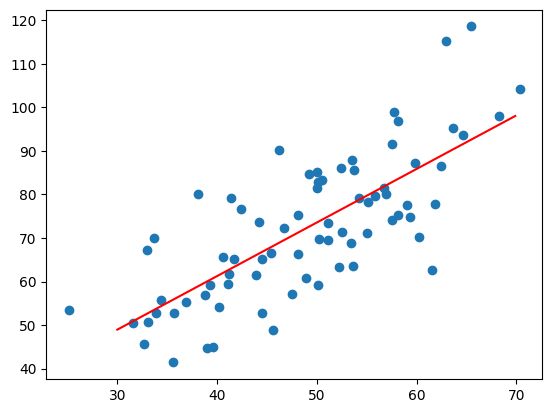

In [24]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line= np.arange(30, 70, 0.1 )
y_line = m * x_line + c

plt.plot(x_line, y_line, 'r')

train_1d = X_train.reshape(75)
plt.scatter(X_train, y_train)
plt.show

### LR model for testing data

<function matplotlib.pyplot.show(close=None, block=None)>

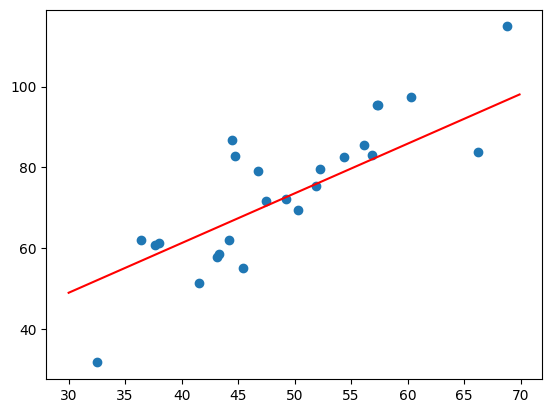

In [27]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line= np.arange(30, 70, 0.1 )
y_line = m * x_line + c

plt.plot(x_line, y_line, 'r')

train_1d = X_test.reshape(25)
plt.scatter(X_test, y_test)
plt.show

### For Another DataSet

In [28]:
data1 = np.loadtxt("FuelEconomy.csv", delimiter = ",")

In [29]:
data1.shape

(100, 2)

In [45]:
x1 = data1[:, 0].reshape(-1,1)
y1 = data1[:, 1]

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [47]:
alg2 = LinearRegression()
alg2.fit(X1_train, y1_train)

LinearRegression()

In [51]:
rounded_coef = np.round(alg2.coef_, 2)
print(rounded_coef[0])

-0.07


In [52]:
print(round(alg2.intercept_, 2))

38.84


In [55]:
score_test = alg2.score(X1_test, y1_test)
score_train = alg2.score(X1_train, y1_train)
rounded_score = round(score_test, 3)
rounded_train= round(score_train, 3)
print(rounded_score, rounded_train)

0.913 0.906


### Linear Regression Model From Scratch for 1Dimensional Input

In [60]:
import numpy as np
data = np.loadtxt('data.csv', delimiter = ',')
data.shape

(100, 2)

In [61]:
x = data[:, 0]
y = data[:, 1]

In [63]:
x.shape

(100,)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [74]:
x_train.shape

(70,)

In [75]:
# defining a fit function for linear regression
def fit(x_train, y_train):
    num = (x_train*y_train).mean() - x_train.mean() * y_train.mean() #element-wise multiplication
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m*x_train.mean()
    return m, c

In [76]:
def predict(x, m, c):
    return m*x +c

In [77]:
def score(y_truth, y_pred):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1-u/v

In [92]:
def cost(x, y, m, c):
    return ((y-m*x-c)**2).mean()

In [93]:
# for test data
m, c = fit(x_train, y_train)
y_test_pred = predict(x_test, m, c)
print("Test Score: ", score(y_test, y_test_pred))

# for training data
y_train_pred = predict(x_train, m, c)
print("Train Score: ", score(y_train, y_train_pred))

print("M is: ", m, "c is: ", c)

print("cost on training data", cost(x_train, y_train, m, c))

Test Score:  0.5828429507750708
Train Score:  0.5540929583938821
M is:  1.171579956779778 c is:  16.5768682358596
cost on training data 105.0803970853677


### LinearRegression on Diabetes DataSet

Problem statement
Diabetes dataset is one of the datasets available in sklearn. The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.

You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Linear Regression training algorithm and thus predictions for the test dataset given.

Read Instructions carefully -

1. Use Linear Regression(in scikit learn) as a training algorithm and submit results predicted by that.
2. Files are in csv format, use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions.  Also prediction values in file should be upto **5** decimal places.
4. Upon submission of predictions, the score you will get is based on coefficient of determination.

In [ ]:
import numpy as np
import sklearn 
from sklearn import datasets
from sklearn.model_selection import train_test_split
diabetes_train = 

In [95]:
import numpy as np

# Load training data
data = np.genfromtxt('train.csv', delimiter=',', skip_header=1)
X_train = data[:, :-1]
y_train = data[:, -1]

# Load test data
X_test = np.genfromtxt('test.csv', delimiter=',', skip_header=1)

In [96]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [97]:
# Predict on the test set
predictions = model.predict(X_test)


In [98]:
# Save predictions to a CSV file
np.savetxt('predictions.csv', predictions, delimiter=',', fmt='%.5f')
